<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Process-and-add-up-all-provinces/states-into-one-row-per-country" data-toc-modified-id="Process-and-add-up-all-provinces/states-into-one-row-per-country-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Process and add up all provinces/states into one row per country</a></span></li><li><span><a href="#List-of-all-affected-countries" data-toc-modified-id="List-of-all-affected-countries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>List of all affected countries</a></span></li></ul></li><li><span><a href="#Current-situation-plots" data-toc-modified-id="Current-situation-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Current situation plots</a></span><ul class="toc-item"><li><span><a href="#Stats-over-calendar-date" data-toc-modified-id="Stats-over-calendar-date-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Stats over calendar date</a></span></li><li><span><a href="#Stats-per-million-population" data-toc-modified-id="Stats-per-million-population-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Stats per million population</a></span></li><li><span><a href="#Stats-over-days-since-start-of-local-outbreak" data-toc-modified-id="Stats-over-days-since-start-of-local-outbreak-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Stats over days since start of local outbreak</a></span></li><li><span><a href="#Case-fatality-rate-per-country" data-toc-modified-id="Case-fatality-rate-per-country-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Case fatality rate per country</a></span></li><li><span><a href="#Stats-by-continent" data-toc-modified-id="Stats-by-continent-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Stats by continent</a></span></li><li><span><a href="#Smoothed-growth-factor" data-toc-modified-id="Smoothed-growth-factor-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Smoothed growth factor</a></span></li><li><span><a href="#New-confirmed/Active-case-ratio" data-toc-modified-id="New-confirmed/Active-case-ratio-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>New confirmed/Active case ratio</a></span></li><li><span><a href="#Stats-for-some-other-countries,-using-linear-scale" data-toc-modified-id="Stats-for-some-other-countries,-using-linear-scale-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Stats for some other countries, using linear scale</a></span></li><li><span><a href="#Pie-charts" data-toc-modified-id="Pie-charts-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Pie charts</a></span></li><li><span><a href="#Country-highlight" data-toc-modified-id="Country-highlight-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Country highlight</a></span></li></ul></li><li><span><a href="#Forecast-plots" data-toc-modified-id="Forecast-plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Forecast plots</a></span><ul class="toc-item"><li><span><a href="#Fit-a-logistic-curve-and-extrapolate-number-of-future-cases" data-toc-modified-id="Fit-a-logistic-curve-and-extrapolate-number-of-future-cases-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fit a logistic curve and extrapolate number of future cases</a></span></li><li><span><a href="#Modelling-fatality-probability-per-day-of-being-infected" data-toc-modified-id="Modelling-fatality-probability-per-day-of-being-infected-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modelling fatality probability per day of being infected</a></span></li><li><span><a href="#Generate-history-of-active-cases;-how-many-people-have-been-sick-for-how-long?" data-toc-modified-id="Generate-history-of-active-cases;-how-many-people-have-been-sick-for-how-long?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Generate history of active cases; how many people have been sick for how long?</a></span></li><li><span><a href="#Simulate-future-development-based-on-history-and-probability-models" data-toc-modified-id="Simulate-future-development-based-on-history-and-probability-models-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Simulate future development based on history and probability models</a></span></li><li><span><a href="#Mitigation-effectiveness" data-toc-modified-id="Mitigation-effectiveness-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Mitigation effectiveness</a></span></li></ul></li></ul></div>

# COVID-19 data visualization

This notebook generates a series of visualizations from the raw data tables, showing some aspects of the ongoing Covid-19 epidemic that I couldn't find in other reports, or in many cases, not for all countries I was interested in. Data from Johns Hopkins University.

An earlier version of the plot of cases per country since the start of the local outbreak was shared on Reddit [here](https://www.reddit.com/r/dataisbeautiful/comments/ff9jn4/oc_number_of_cases_per_country_counting_from_the/).   Another plot, of the average growth factor per country, was posted [here](https://www.reddit.com/r/dataisbeautiful/comments/fliec2/oc_covid19_growth_factor_over_time_in_various/).

Note that the links in the Table of Contents above don't work in the Github preview, but they do on [nbviewer](https://nbviewer.jupyter.org/github/JeroenKools/covid19/tree/master/).

Want to see these graphs for some other countries, or modify the values for the simulations? The easiest and quickest way to run the notebook and make modifications yourself is to open this notebook in [Colab](https://colab.research.google.com/github/JeroenKools/covid19/blob/master/COVID-19.ipynb) or [Binder](https://hub-binder.mybinder.ovh/user/jeroenkools-covid19-wt257qfb/notebooks/COVID-19.ipynb).

## Setup

Import code and parameters from [`covid19_util.py`](covid19_util.py) and [`covid_processing.py`](covid19_processing.py).

Do some additional setup in case the notebook is being run on Google Colab.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
is_colab = 'google.colab' in sys.modules
if is_colab:
    if not "covid19" in sys.path:
        try:
            !git clone https://github.com/JeroenKools/covid19.git
        except e: 
            pass
    try:
        import geonamescache
    except ModuleNotFoundError:
        !pip install geonamescache
        import geonamescache
    sys.path.append("covid19")
    %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
    matplotlib.rcParams['figure.dpi'] = 75
    
    
from covid19_util import *
from covid19_processing import *

In [2]:
data = Covid19Processing()

### Raw confirmed cases data, per region/state

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  ...  6/27/20  6/28/20  6/29/20  6/30/20  7/1/20  \
0          0        0  ...    30616    30967    31238    31517   31836   
1          0        0  ...     2330     2402     2466     2535    2580   
2          0        0  ...    12968    13273    13571    13907   14272   
3          0        0  ...      855      855      855      855     855   
4          0        0  ...      259      267      276      284     291   
..       ...      ...  ...      ...      ...      ...      ...     ...   
261        0        0  ...      713      713      713      714     715   
262        0        0  ...     1103     1118     1128     1158    1190   
263        0        0  ...      272      272      272      303     303   
264        0        0  ...     5799     5849     5900     5900    6005   
265        0        0  ...       24       27       27       27      35   

     7/2/20  7/3/20  
0     32022   32324  
1      2662    2752  
2     14657   15070  
3       855     855  
4       315     328  
..      ...     ...  
261     717     719  
262    1221    1240  
263     303     309  
264    6058    6058  
265      35      35  

[266 rows x 168 columns]

### Process and add up all provinces/states into one row per country 

This also adds in a few data points for China from before the start of the Johns Hopkins data, from [Wikipedia](https://en.wikipedia.org/wiki/Timeline_of_the_2019%E2%80%9320_coronavirus_outbreak_in_December_2019_%E2%80%93_January_2020).

Then, display summaries of the confirmed cases by country and by continent.

In [3]:
data.process(rows=20, debug=False)

### Table of confirmed cases by country

2020-01-17  2020-01-18  2020-01-20  2020-01-22  \
Country/Region                                                        
Afghanistan                   0           0           0           0   
Albania                       0           0           0           0   
Algeria                       0           0           0           0   
Andorra                       0           0           0           0   
Angola                        0           0           0           0   
Antigua and Barbuda           0           0           0           0   
Argentina                     0           0           0           0   
Armenia                       0           0           0           0   
Australia                     0           0           0           0   
Austria                       0           0           0           0   
...                         ...         ...         ...         ...   
United States                 0           0           0           1   
Uruguay                       0           0           0           0   
Uzbekistan                    0           0           0           0   
Vatican City                  0           0           0           0   
Venezuela                     0           0           0           0   
Vietnam                       0           0           0           0   
Western Sahara                0           0           0           0   
Yemen                         0           0           0           0   
Zambia                        0           0           0           0   
Zimbabwe                      0           0           0           0   

                     2020-01-23  ...  2020-06-29  2020-06-30  2020-07-01  \
Country/Region                   ...                                       
Afghanistan                   0  ...       31238       31517       31836   
Albania                       0  ...        2466        2535        2580   
Algeria                       0  ...       13571       13907       14272   
Andorra                       0  ...         855         855         855   
Angola                        0  ...         276         284         291   
Antigua and Barbuda           0  ...          69          69          69   
Argentina                     0  ...       62268       64530       67197   
Armenia                       0  ...       25127       25542       26065   
Australia                     0  ...        7834        7920        8001   
Austria                       0  ...       17723       17766       17873   
...                         ...  ...         ...         ...         ...   
United States                 1  ...     2590668     2636414     2687588   
Uruguay                       0  ...         932         936         943   
Uzbekistan                    0  ...        8222        8503        8781   
Vatican City                  0  ...          12          12          12   
Venezuela                     0  ...        5530        5832        6062   
Vietnam                       2  ...         355         355         355   
Western Sahara                0  ...          10          10          10   
Yemen                         0  ...        1128        1158        1190   
Zambia                        0  ...        1568        1594        1632   
Zimbabwe                      0  ...         574         591         605   

                     2020-07-02  2020-07-03  
Country/Region                               
Afghanistan               32022       32324  
Albania                    2662        2752  
Algeria                   14657       15070  
Andorra                     855         855  
Angola                      315         328  
Antigua and Barbuda          69          68  
Argentina                 69941       72786  
Armenia                   26658       27320  
Australia                  8066        8260  
Austria                   17941       18050  
...                         ...         ...  
United States           2742049     2794

### Table of confirmed cases by continent/region

2020-01-17  2020-01-18  2020-01-20  2020-01-22  2020-01-23  \
Asia                      45          62         218         554         653   
Europe                     0           0           0           0           0   
Africa                     0           0           0           0           0   
North America              0           0           0           1           1   
South America              0           0           0           0           0   
Oceania                    0           0           0           0           0   
All except China           0           0           0           7          11   
World                     45          62         218         555         654   

                  ...  2020-06-29  2020-06-30  2020-07-01  2020-07-02  \
Asia              ...     2255842     2302269     2368759     2418658   
Europe            ...     2394725     2407685     2421336     2435190   
Africa            ...      393232      404796      418211      432331   
North America     ...     3039090     3094334     3155404     3221072   
South America     ...     2178001     2225846     2287092     2350921   
Oceania           ...        9391        9477        9560        9625   
All except China  ...    10188730    10363094    10579352    10787096   
World             ...    10273510    10447879    10664168    10871926   

                  2020-07-03  
Asia                 2469149  
Europe               2449121  
Africa                447464  
North America        3284863  
South America        2410077  
Oceania                 9819  
All except China    10990040  
World               11074878  

[8 rows x 167 columns]

### List of all affected countries

In [4]:
data.list_countries()

### 188 countries/territories affected:


Afghanistan          Albania              Algeria              Andorra              Angola              
Antigua and Barbuda  Argentina            Armenia              Australia            Austria             
Azerbaijan           Bahamas              Bahrain              Bangladesh           Barbados            
Belarus              Belgium              Belize               Benin                Bhutan              
Bolivia              Bosnia and Herzego.  Botswana             Brazil               Brunei              
Bulgaria             Burkina Faso         Burma                Burundi              Cambodia            
Cameroon             Canada               Cape Verde           Central African Re.  Chad                
Chile                China                Colombia             Comoros              Congo (Brazzaville) 
Congo (Kinshasa)     Costa Rica           Croatia              Cuba                 Cyprus              
Czechia              Denmark              Diamond Princ

## Current situation plots

### Interactive plot

When running locally, or on a server like Google Colab or MyBinder, this interactive plot allows easy customization of the selected countries, metrics and more. Unfortunately this doesn't work in the Github notebook viewer.

In [5]:
data.set_default_countries(["World", "Brazil", "China", "Japan", "South Korea", "United States", "India", "Italy", "Germany",
                     "Russia", "Netherlands", "Spain"])

interact(data.plot_interactive, 
         x_metric=["calendar_date", "day_number"], 
         y_metric=["confirmed", "deaths", "active", "new confirmed", "new deaths", 
                   "active/population", "deaths/population", "new confirmed/population"],
         use_log_scale=True);

interactive(children=(Dropdown(description='x_metric', options=('calendar_date', 'day_number'), value='calenda…

### Stats over calendar date

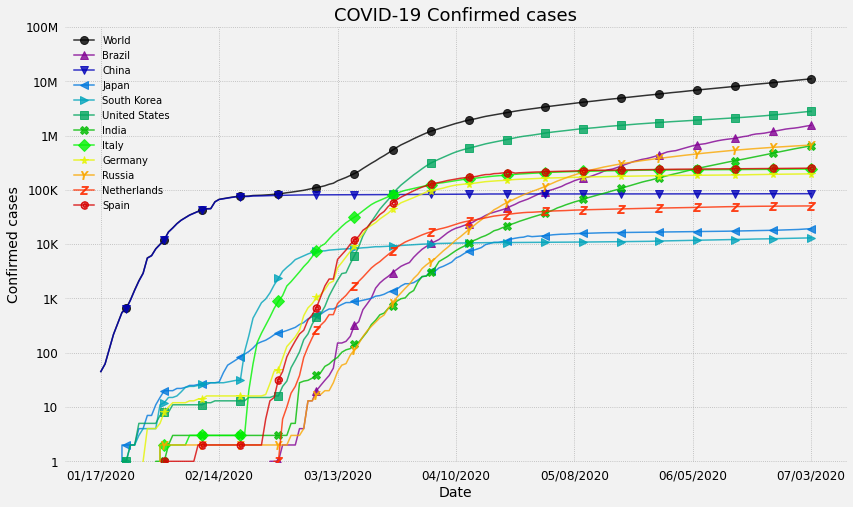

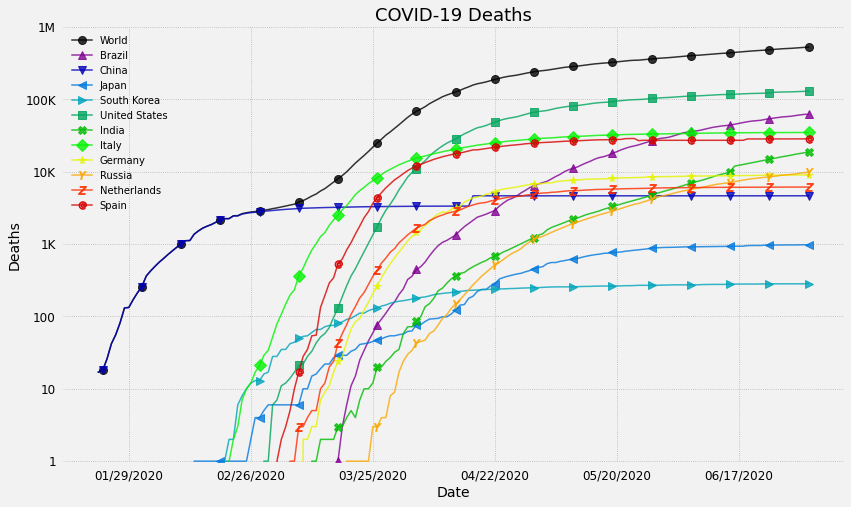

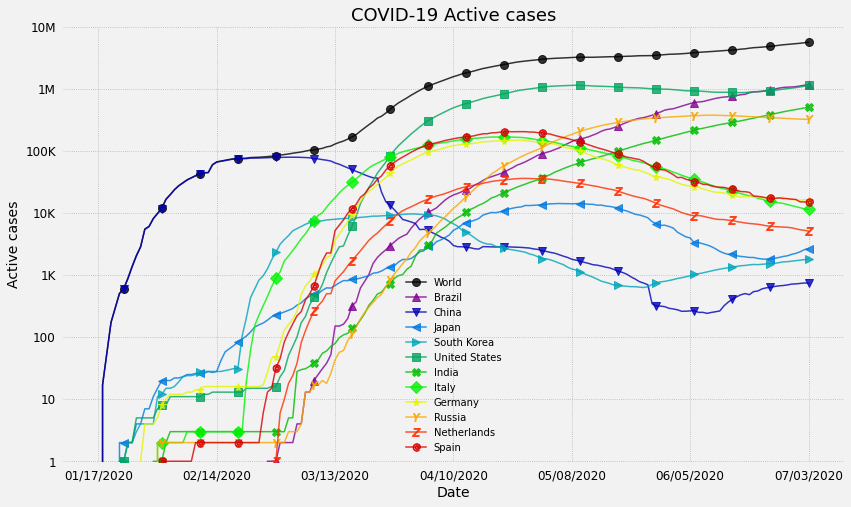

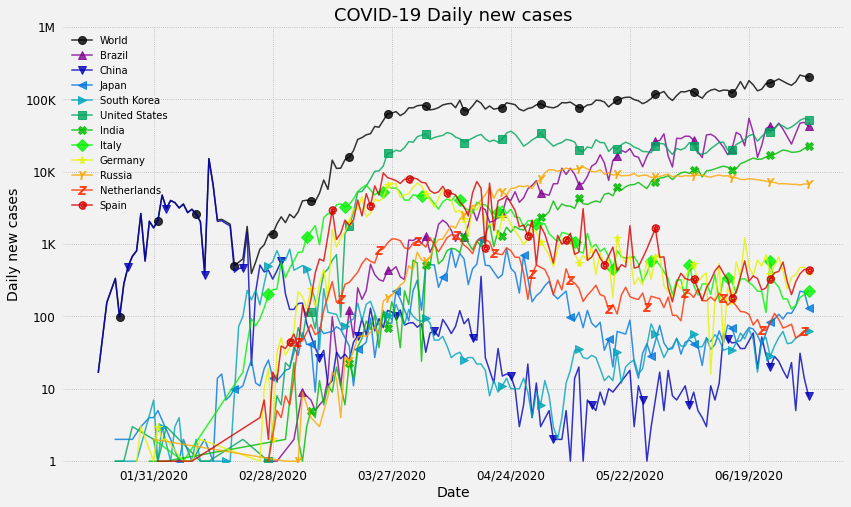

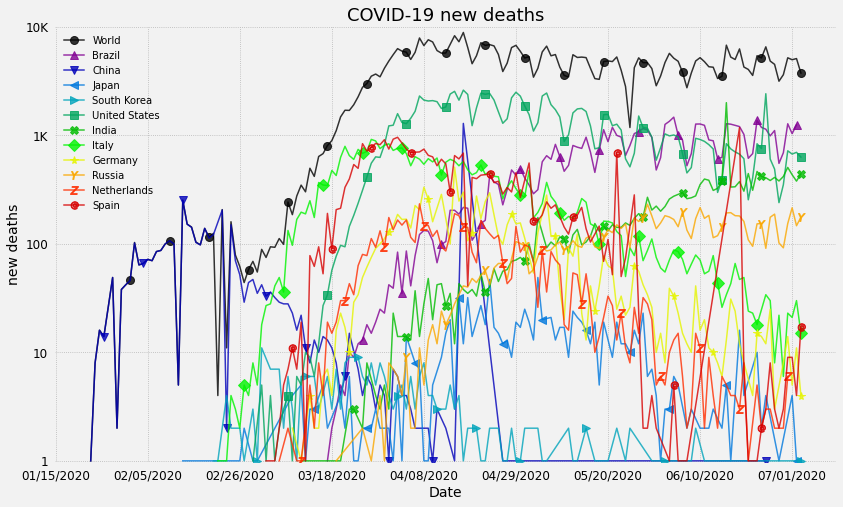

In [6]:
for y_metric in ["confirmed", "deaths", "active", "new confirmed", "new deaths"]:
    data.plot("calendar_date", y_metric)

### Stats per million population

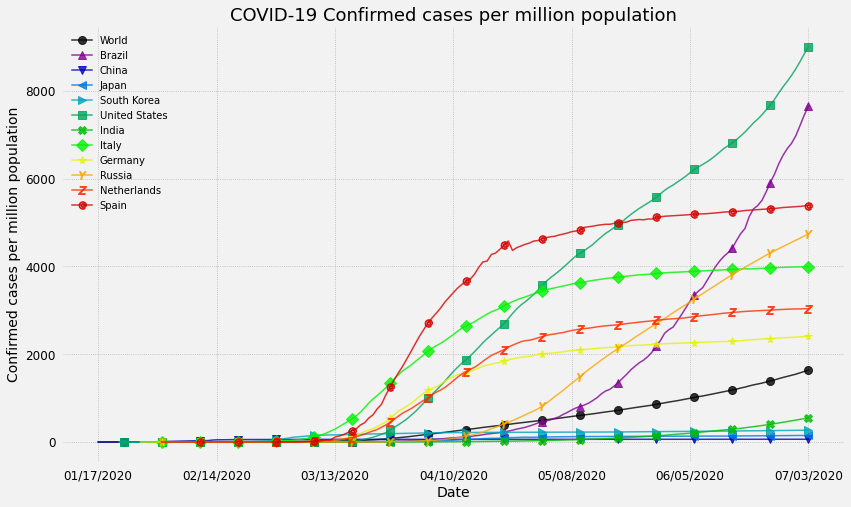

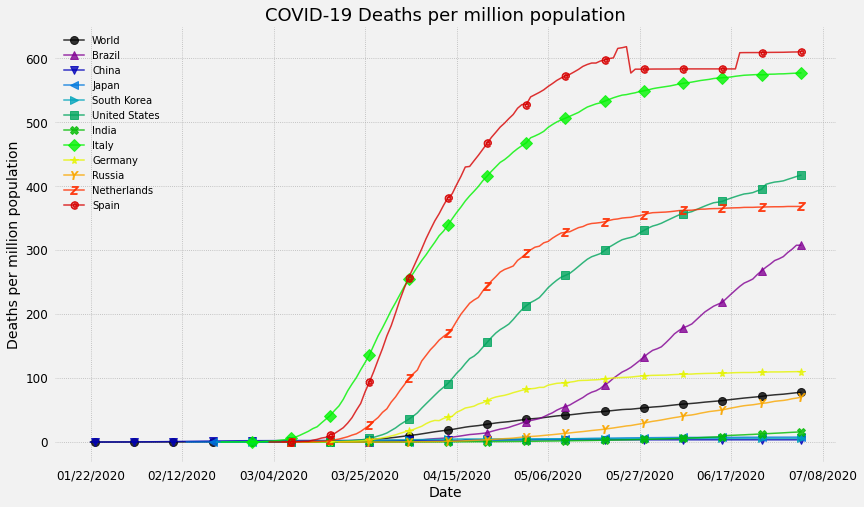

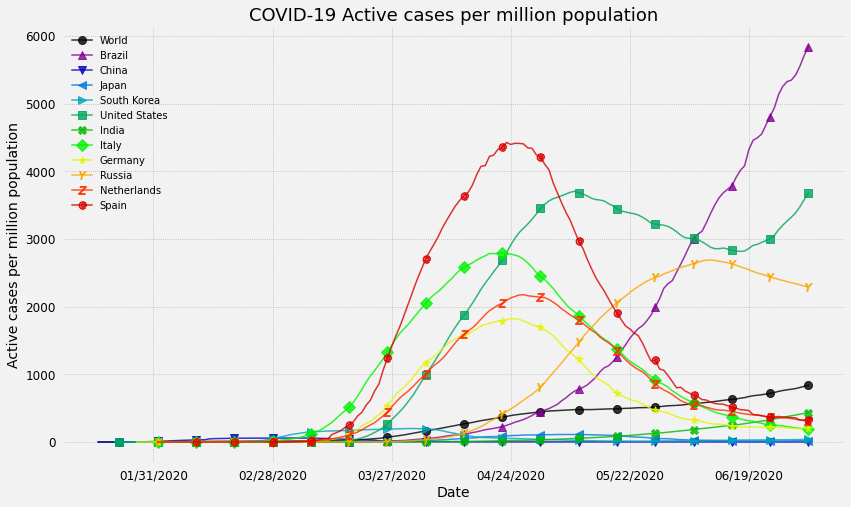

In [7]:
for y_metric in ["confirmed/population", "deaths/population", "active/population"]:
    data.plot("calendar_date", y_metric)

### Stats over days since start of local outbreak

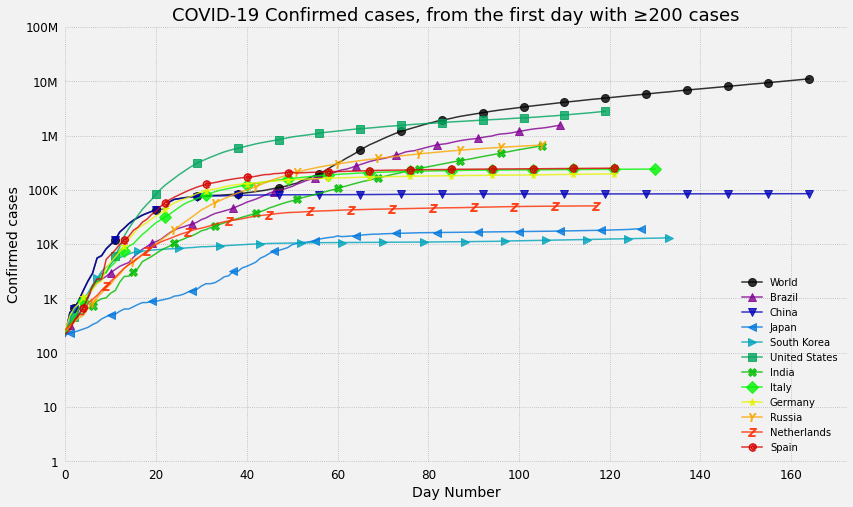

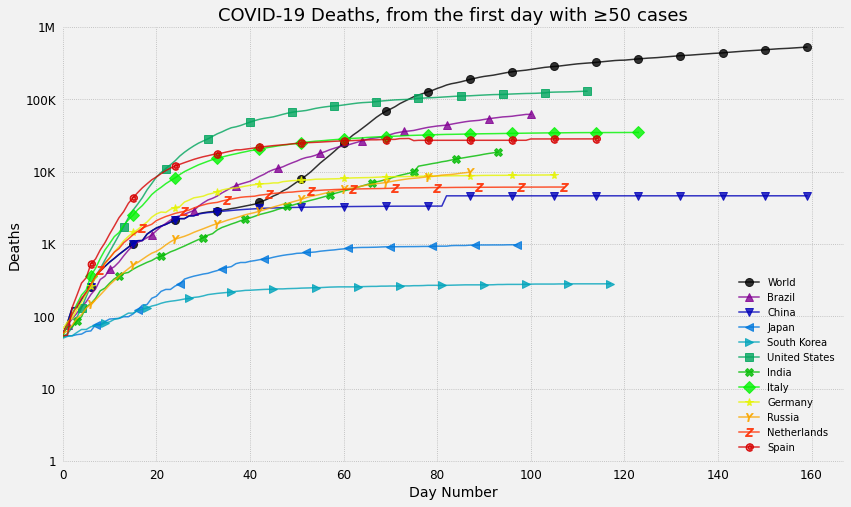

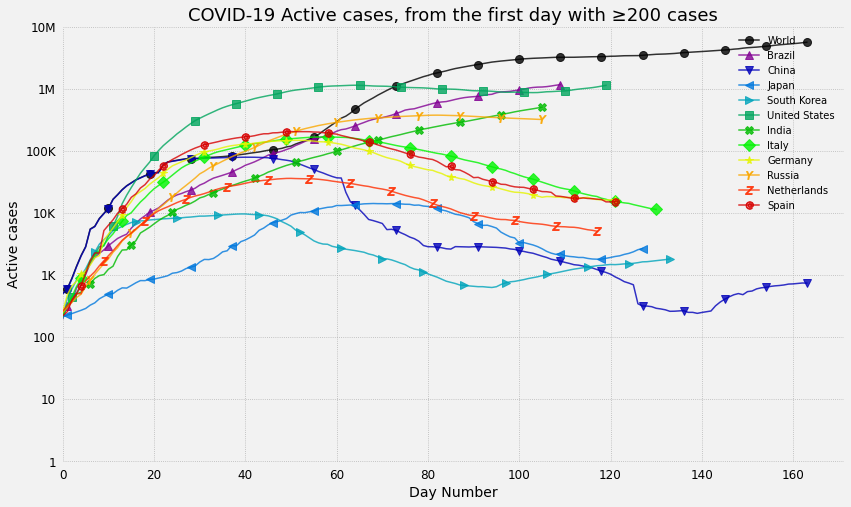

In [8]:
data.plot("day_number", "confirmed", min_cases=200)
data.plot("day_number", "deaths", min_cases=50)
data.plot("day_number", "active", min_cases=200)

### Case fatality rate per country

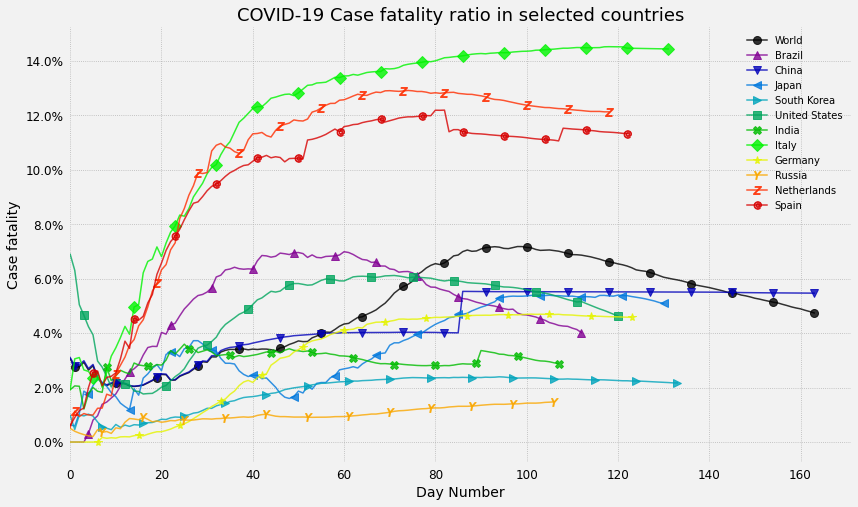

In [9]:
data.plot("day_number", "deaths/confirmed", min_cases=150, use_log_scale=False)

### Stats by continent

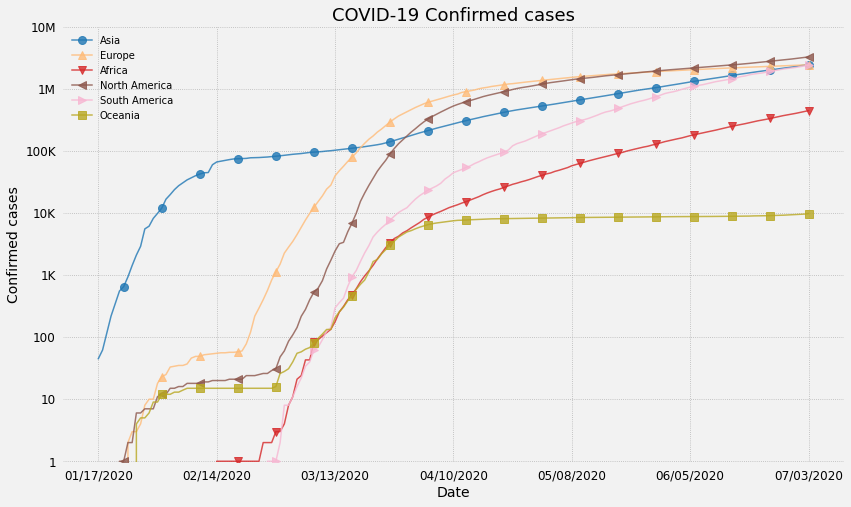

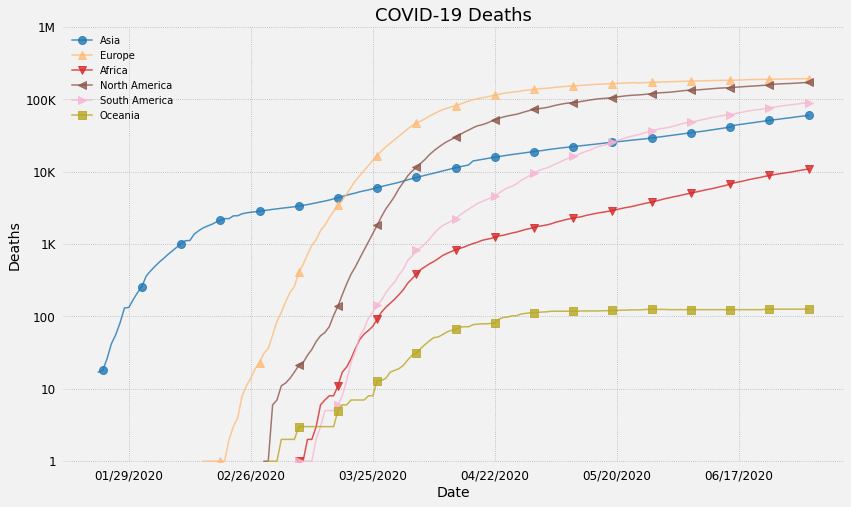

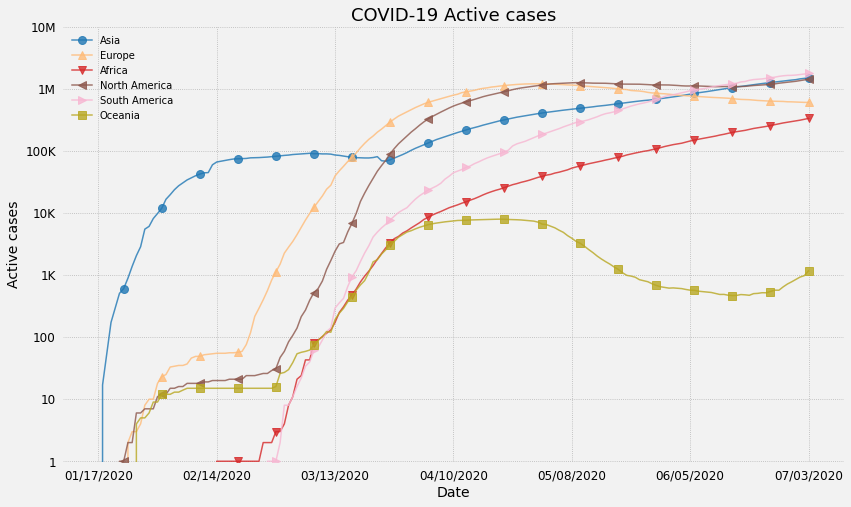

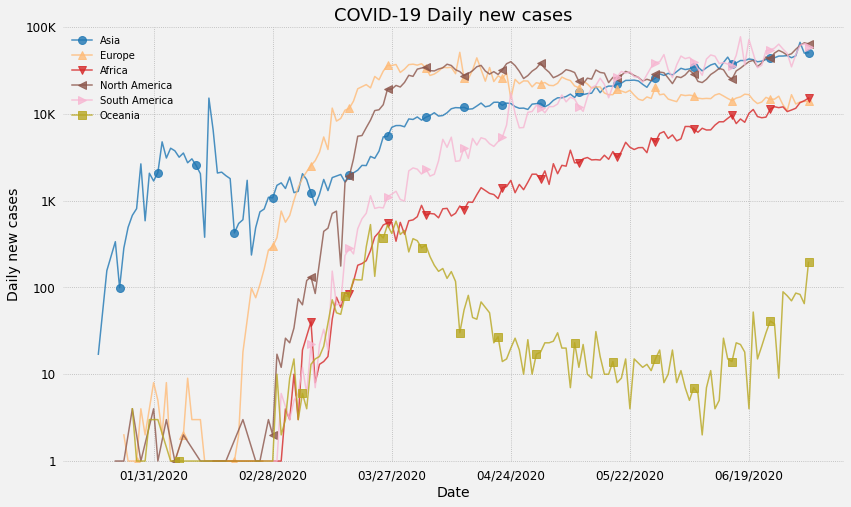

In [10]:
continents = ["Asia", "Europe", "Africa", "North America", "South America", "Oceania"]

for y_metric in ["confirmed", "deaths", "active", "new confirmed"]:
    data.plot("calendar_date", y_metric, continents, "tab20", fixed_country_colors=False)

### Smoothed growth factor

The growth factor is the multiplier for the number of **new** cases per day. <br>For example, if there are 100 new cases on day *n* and 150 new cases on day *n+1*, the growth factor is 1.5.

* A growth factor larger than 1 means the outbreak is accelerating; it is growing exponentially.
* A growth factor of 1 means the outbreak is growing linearly.
* A growth factor of less than 1 means the outbreak is still growing, but slowing down.
* A growth factor of 0 means there are no new cases.

In this plot, the growth factor is averaged over 5 days to smooth out some large day-to-day variations. 

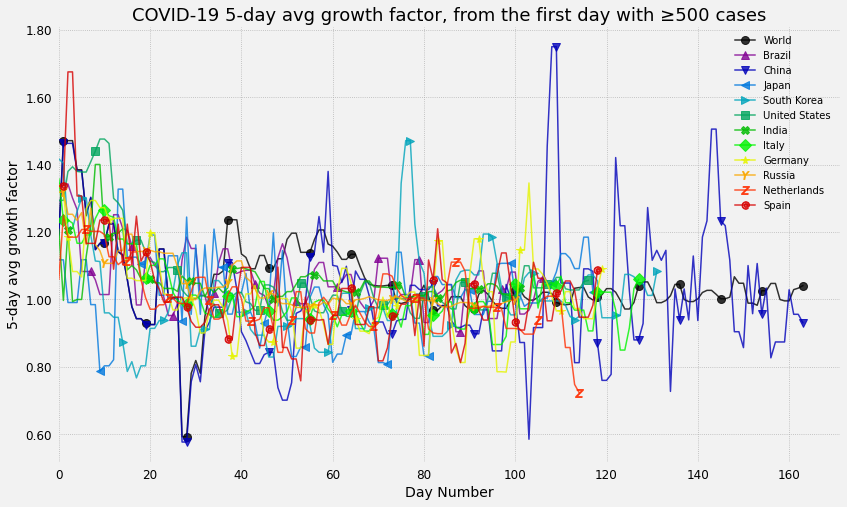

In [11]:
data.plot("day_number", "growth_factor", min_cases=500, sigma=5, 
          fixed_country_colors=False, use_log_scale=False)    

### New confirmed/Active case ratio

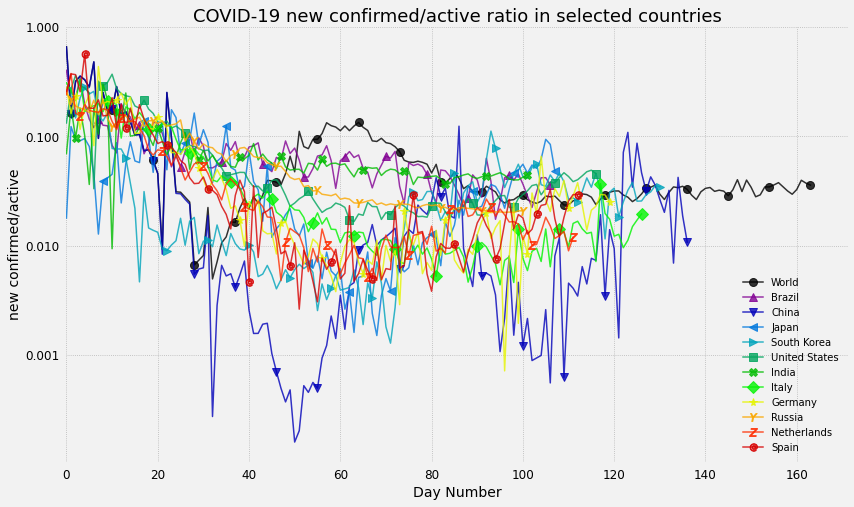

In [12]:
data.plot("day_number", "new confirmed/active", min_cases=500, use_log_scale=1)

### Stats for some other countries, using linear scale

This shows how on a linear Y-axis, it becomes hard to examine the trend in all but the top few countries.

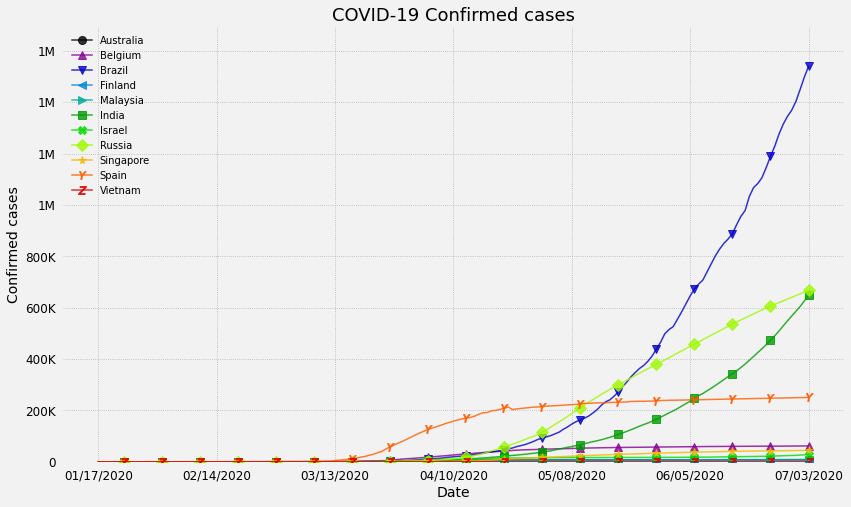

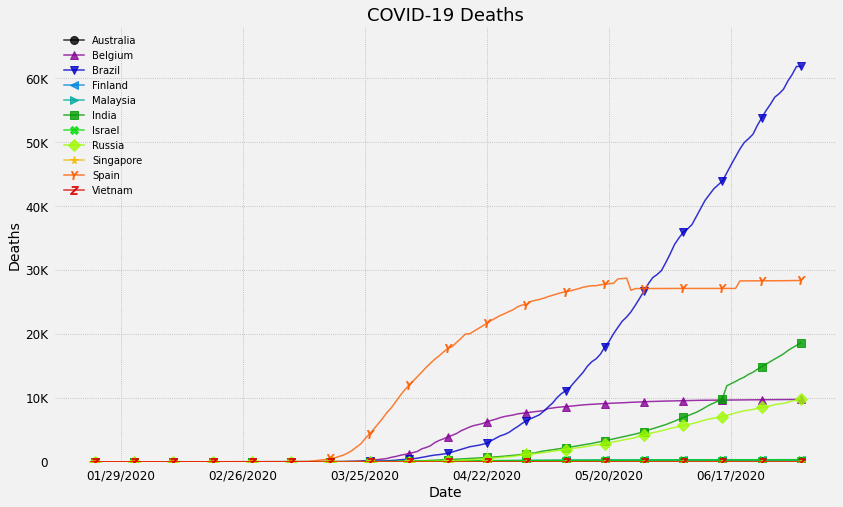

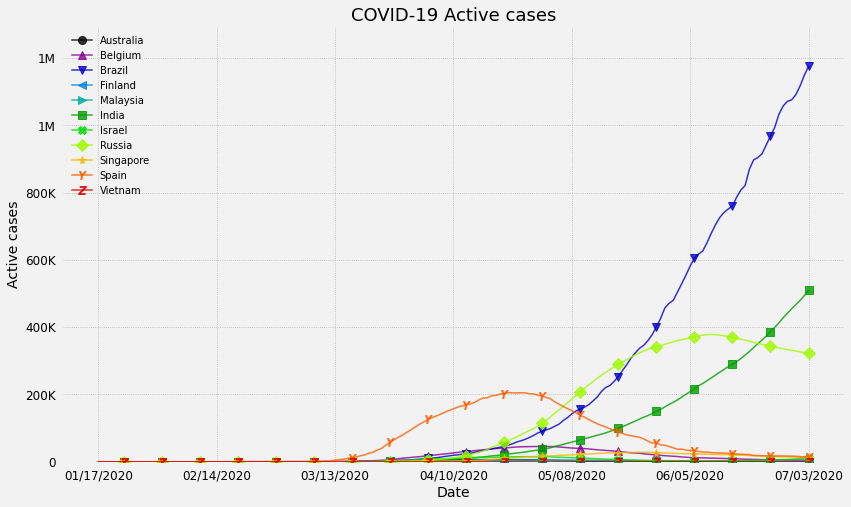

In [13]:
data.set_default_countries(["Australia", "Belgium", "Brazil", "Finland", "Malaysia", "India", 
                            "Israel", "Russia", "Singapore", "Spain", "Vietnam"])


for y_metric in ["confirmed", "deaths", "active"]:
    data.plot("calendar_date", y_metric, use_log_scale=False)

### Pie charts

Everybody loves pie charts.

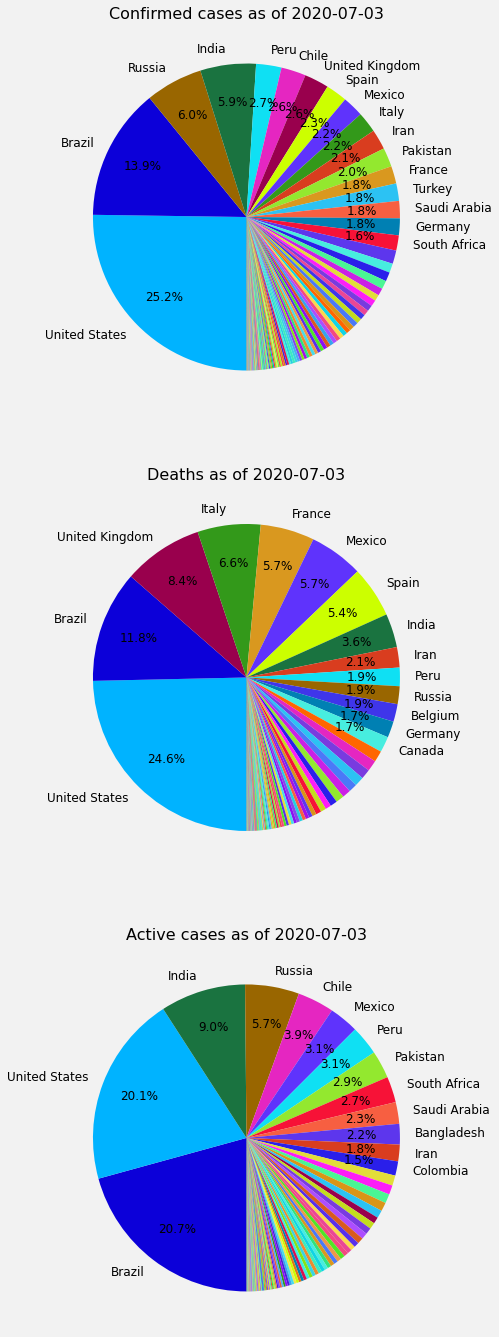

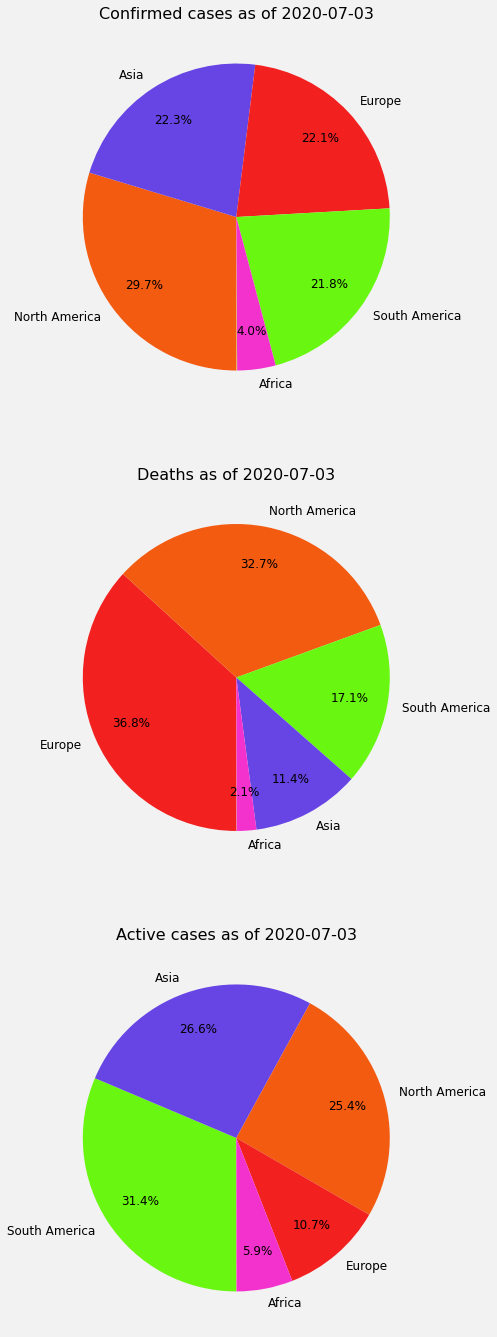

In [14]:
for mode in ["country", "continent"]:
    data.plot_pie(["confirmed cases", "deaths", "active cases"], mode)

### Country highlight

new_cases  new_deaths
2020-06-27      42705         489
2020-06-28      39035         240
2020-06-29      41374         351
2020-06-30      45746         721
2020-07-01      51174         673
2020-07-02      54461         698
2020-07-03      52104         631

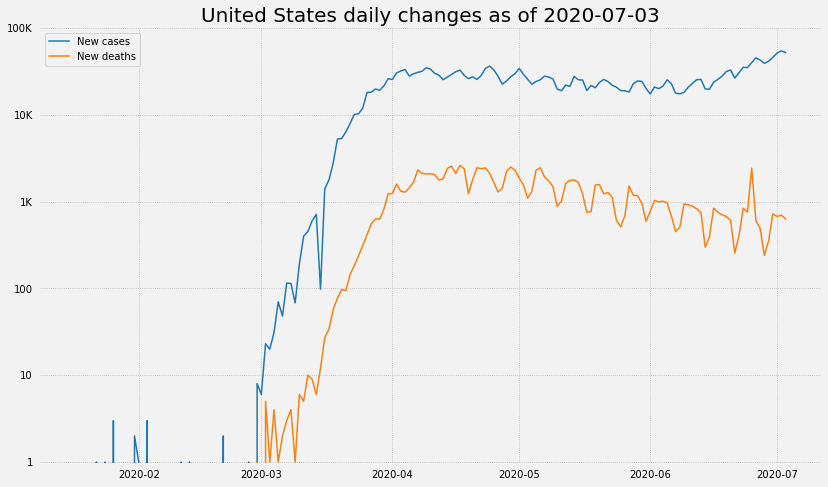

In [15]:
data.country_highlight("United States")

## Forecast plots

First, model the probability distribution of dying after a given number of days.

We can consider a case recovered if they survive for a long enough time.

### Fit a logistic curve and extrapolate number of future cases

This tries to fit a [logistic](https://en.wikipedia.org/wiki/Logistic_function) or 'S-shape' curve to the data so far. While it is reasonable to expect that the total number of cases in any epidemic will eventually roughly have such a shape, the crucial parameters are difficult to predict. For example, changes in spread rate due to policy changes, or the possibility of a second wave of infections from another country are not captured at all.

For some countries the results look plausible enough, while for some others it can give extremely unlikely results, like predicting a number of cases that's many times the country's population.

**Note**: This model is ill-suited for a trend that changes from logistic growth to linear growth, or one that has multiple logistic stages. It is forced to level off to completely flat even when that doesn't really align with the data we have.

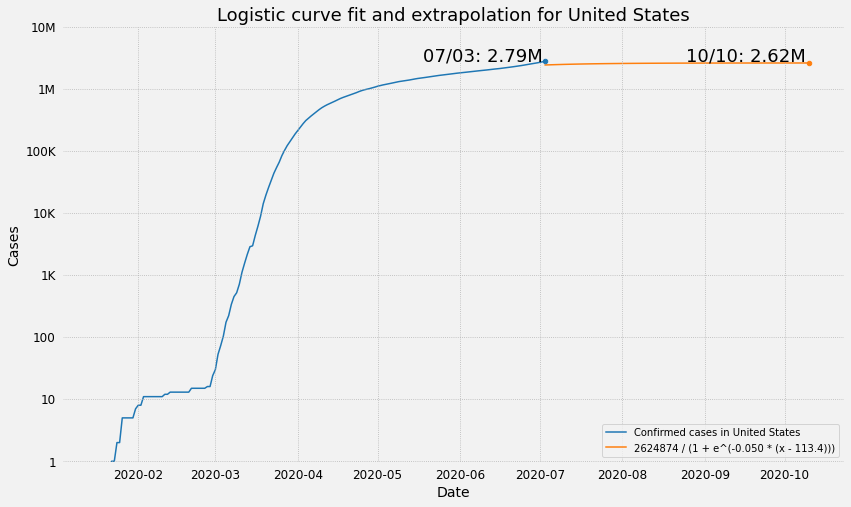

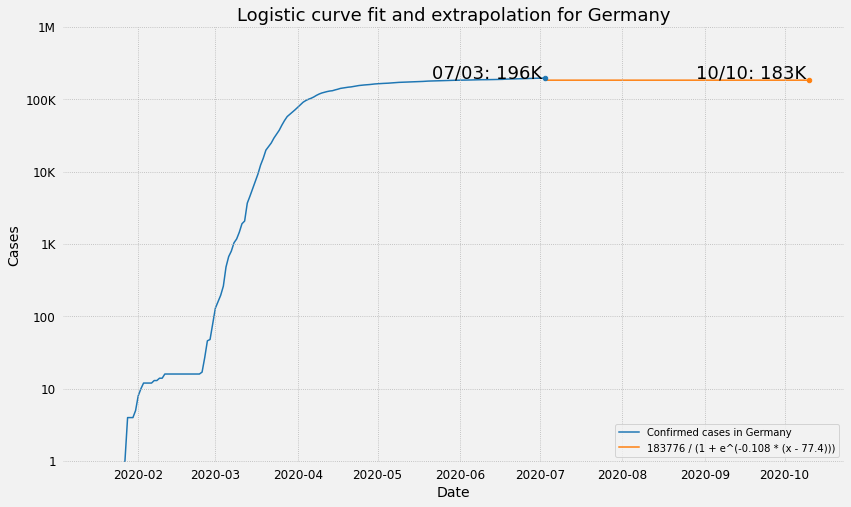

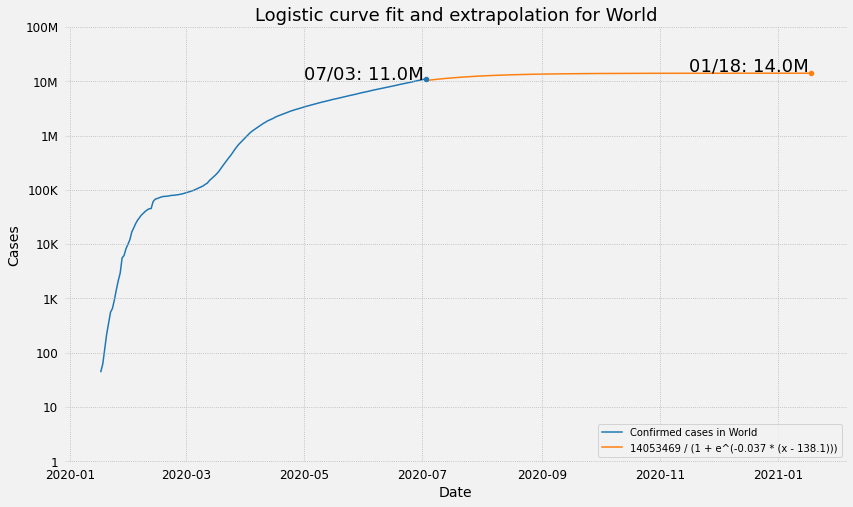

In [16]:
data.curve_fit("United States", days=100)
data.curve_fit("Germany", days=100)
data.curve_fit("World", days=200)

### Modelling fatality probability per day of being infected

[Source](https://www.mdpi.com/2077-0383/9/2/538). This models the *hospitalization to death* distribution, because confirmed cases in the JHU dataset are not backdated to the onset of symptoms.

Input CFR: 4.00%. Model result: 96.00% of being alive after 30 days

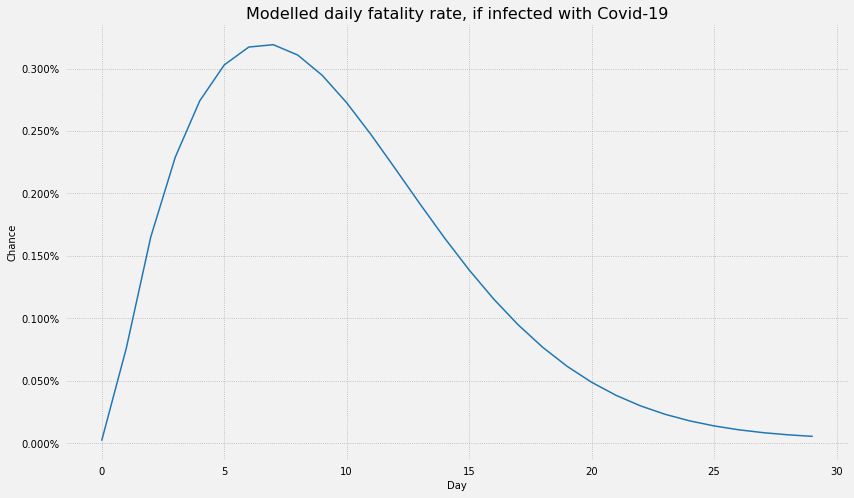

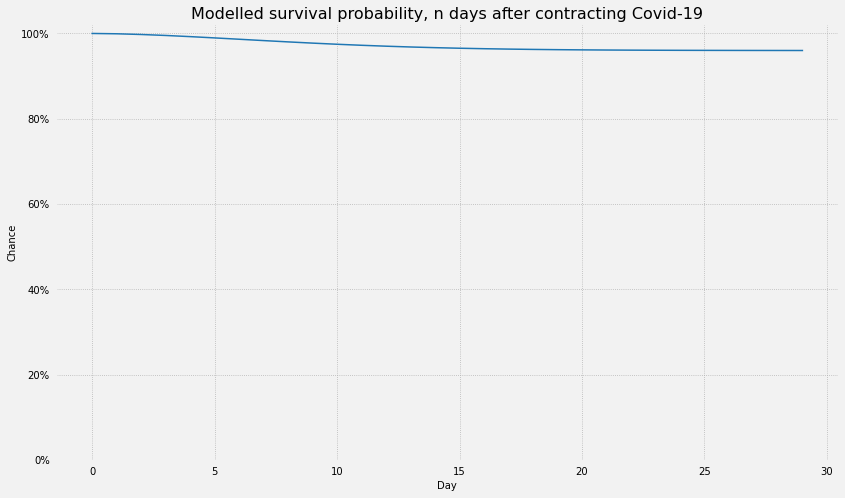

In [17]:
death_chance_per_day(cfr=0.04, s=1.75, mu=0.5, sigma=10, length=30, do_plot=True)

### Generate history of active cases; how many people have been sick for how long?

Data on **how long** people have been sick is not available, so it is reconstructed using the observed distribution of deaths by case duration.

In [18]:
data.simulate_country_history(country="United States", history_length=7, show_result=True);

<br>**Last 10 days in United States, showing a 7-day case duration history:**

confirmed  deaths  recovered  active  uninfected  active_0  \
2020-06-24    2382426  122604    2186164  219060   307850437     34934   
2020-06-25    2422299  125026    2217602  231050   307810564     39872   
2020-06-26    2467554  125631    2250308  244842   307765309     45254   
2020-06-27    2510259  126120    2276707  254821   307722604     42704   
2020-06-28    2549294  126360    2307210  267447   307683569     39034   
2020-06-29    2590668  126711    2342371  278305   307642195     41373   
2020-06-30    2636414  127432    2377283  288860   307596449     45745   
2020-07-01    2687588  128105    2417134  305095   307545275     51173   
2020-07-02    2742049  128803    2462366  319676   307490814     54460   
2020-07-03    2794153  129434    2505046  326523   307438710     52103   

            active_1  active_2  active_3  active_4  active_5  active_6  
2020-06-24     35187     30530     26428     32733     31460     27784  
2020-06-25     34929     35175     30513     26409     32711     31438  
2020-06-26     39871     34926     35171     30508     26403     32706  
2020-06-27     45253     39868     34923     35167     30504     26398  
2020-06-28     42704     45252     39867     34921     35165     30502  
2020-06-29     39034     42702     45250     39864     34917     35161  
2020-06-30     41372     39030     42697     45244     39858     34911  
2020-07-01     45744     41369     39026     42692     45238     39851  
2020-07-02     51172     45740     41364     39020     42686     45231  
2020-07-03     54459     51169     45736     41359     39014     42680

### Simulate future development based on history and probability models

This shows 3 simulations with the only difference being the effectiveness of lockdowns and other mitigation efforts.

1. Effective lockdown: Assumes normal conditions at the start, followed by a quick and very strict lockdown for as long as it takes. This is the best case, but in my opinion somewhat unlikely.
2. Ineffective lockdown: A late and halfhearted attempt at a lockdown is done, but the virus keeps spreading at a half speed. This would be pretty bad; most of the population would be infected before a vaccine is likely to be available.
3.  Prolonged battle: Alternating periods of strict lockdowns with more relaxed periods softens the blow to the economy, and stalls the number of infections until a vaccine can hopefully be developed, or until eventually, herd immunity kicks in.

Please note that this is *very* speculative, and highly dependent on:

* The value chosen for the mitigation factor. Together with R<sub>0</sub>, this represents the reduction in spread based on the effectives of quarantines, lockdowns and other countermeasures, and determines the effective reproductive rate R<sub>eff</sub> . For example, a mitigation factor of 0.7 means the disease spreads 70% as fast as it would without any countermeasures. If R<sub>0</sub> is 2, the mitigation factor is 0.8, and 98% of the population has not yet been infected,  
R<sub>eff</sub> = 2 \* 0.8 \* 0.98 = 1.568,  
meaning that effectively, every 1000 infected people will spread the disease to an average of 1568 uninfected people. 
<br><br>The input for mitigation factor is a list that gets interpolated to the same length as the number of days to simulate. <br><br>For example, simulating 5 days with a mitigation trend of `[1.0, 0.8]` will use growth rates of `[1.0, 0.95, 0.90, 0.85, 0.80]`.


* The value chosen for case fatality rate (cfr); evidence so far suggests a range from 0.01 to 0.06


Other limitations of the simulation:

* Doesn't consider incubation time 
* Doesn't factor in international travel and potential recontamination/reseeding for second and later waves.
* Doesn't consider effect on death rate when the number of active cases overwhelms capacity (**TODO**)

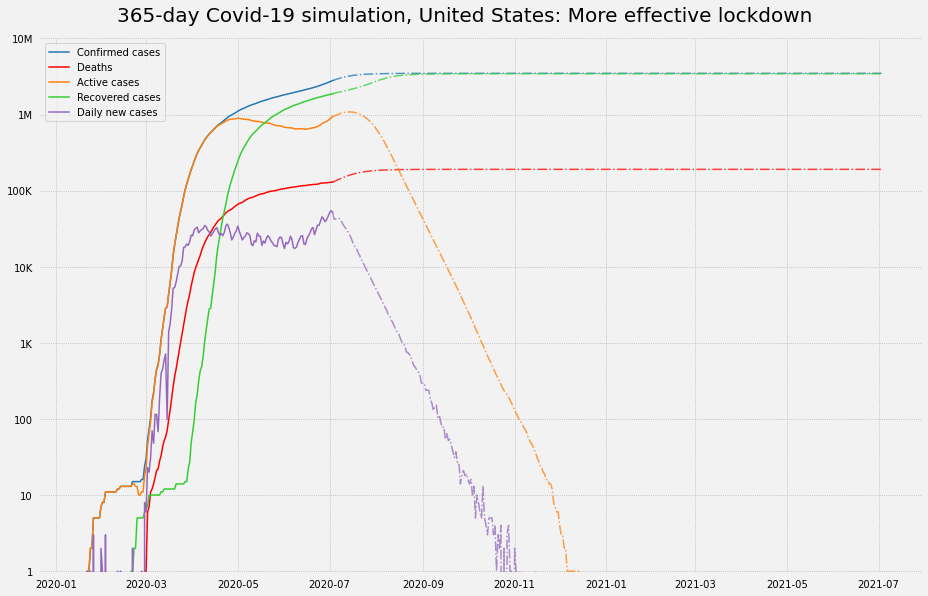

### More effective lockdown final tally:

Confirmed: 3.47M,
Deaths: 190K,
Recovered: 3.43M,
Peak active: 1.08M at 2020-07-15,
Uninfected: 306M


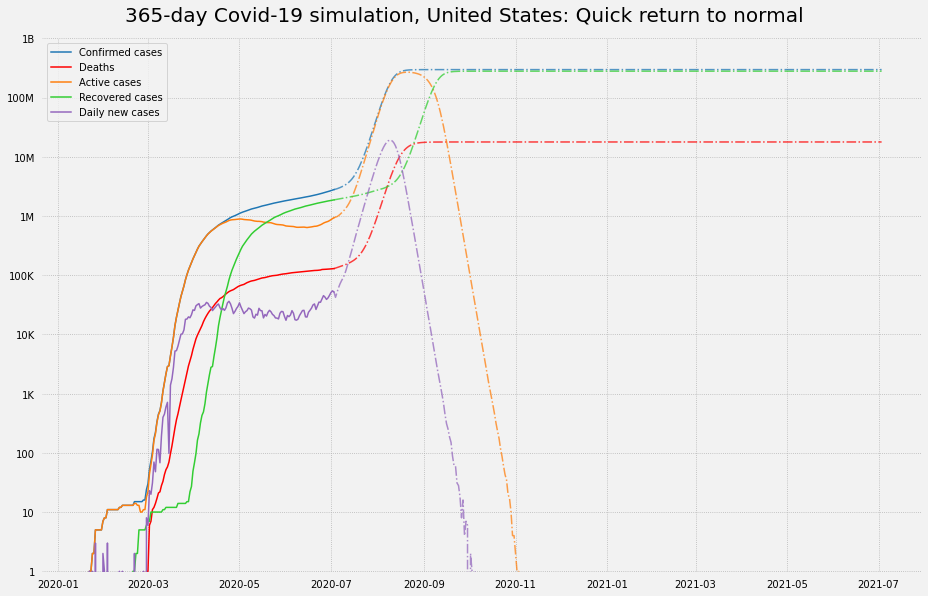

### Quick return to normal final tally:

Confirmed: 297M,
Deaths: 17.8M,
Recovered: 279M,
Peak active: 268M at 2020-08-21,
Uninfected: 13.0M


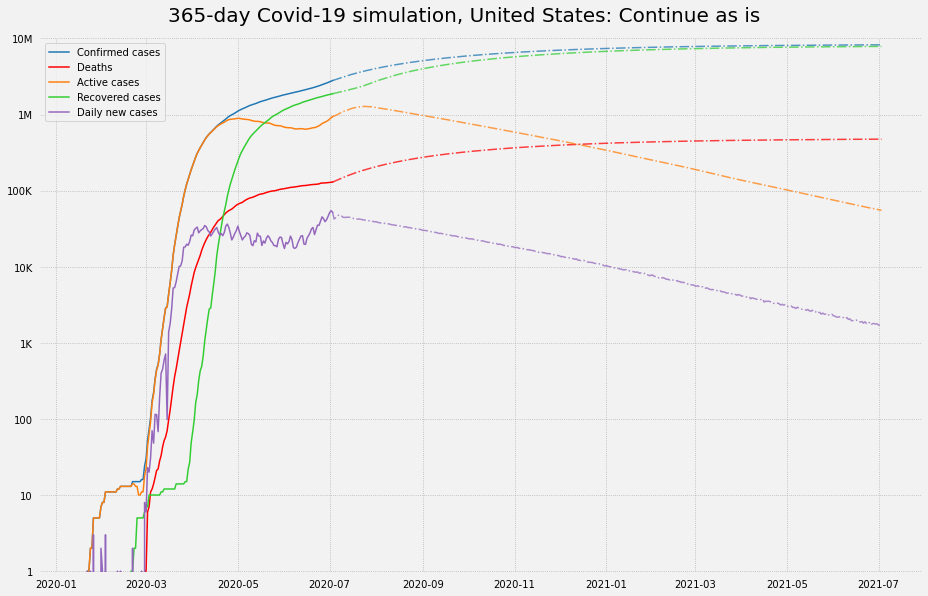

### Continue as is final tally:

Confirmed: 8.23M,
Deaths: 474K,
Recovered: 7.85M,
Peak active: 1.27M at 2020-07-24,
Uninfected: 301M


In [19]:
S = 0.20              # mitigation effectiveness under severe lockdown
M = 0.30              # mitigation effectiveness under moderate lockdown
W = 0.50              # mitigation effectiveness under weak lockdown
N = 1.00              # mitigation effectiveness under normal conditions

# Values inspired by the mitigation effectiveness analysis below
I = 0.31   # Italy, Iran
C = 0.22   # China
K = 0.175  # South Korea
US = 0.32  # US

cfr = 0.06 # https://arxiv.org/abs/2003.09320
r0 = 3.1   # https://arxiv.org/abs/2003.09320

scenarios = {
    "More effective lockdown":   [US,S],
    "Quick return to normal":    [US,N],
    "Continue as is":            [US,US]
}

for scenario in scenarios:
    simulation = data.plot_simulation(country="United States", days=365, 
                                  mitigation_trend=scenarios[scenario], 
                                  cfr=cfr, r0=r0, scenario_name=scenario)

### Mitigation effectiveness

Simulation of developments after the start of lockdowns and other countermeasures in some countries that were affected early.

By comparing the actual course of events with those of simulations with different mitigation effectiveness, we can approximate how effective the real countermeasures were.

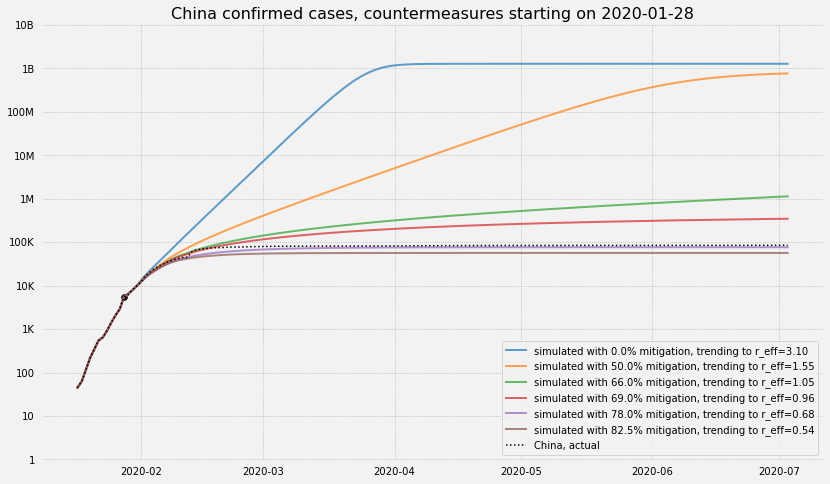

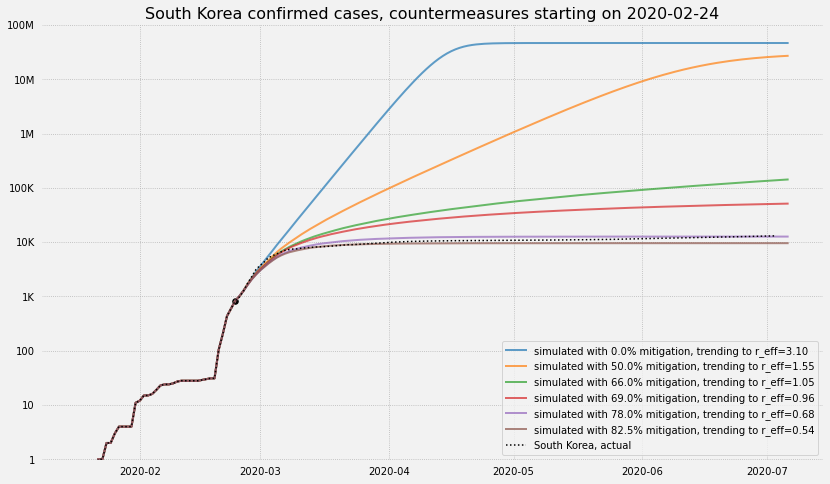

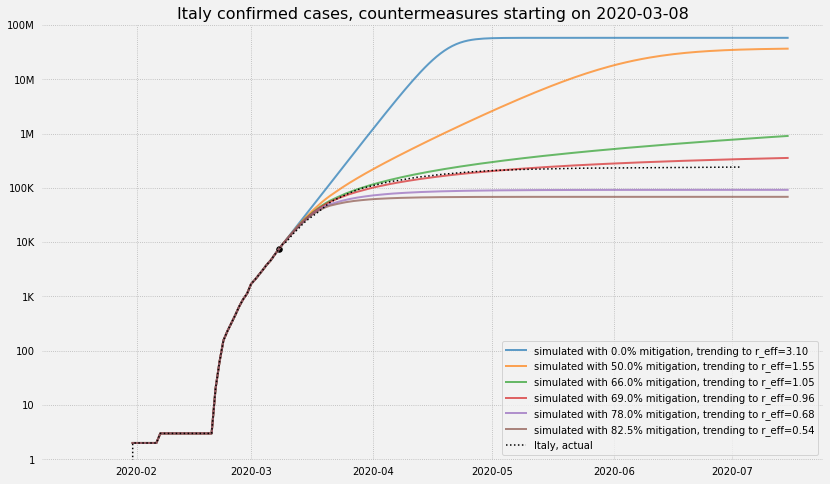

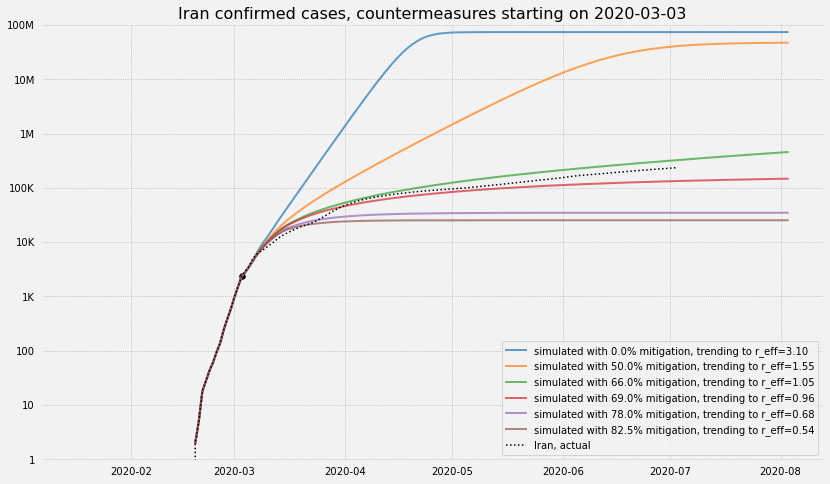

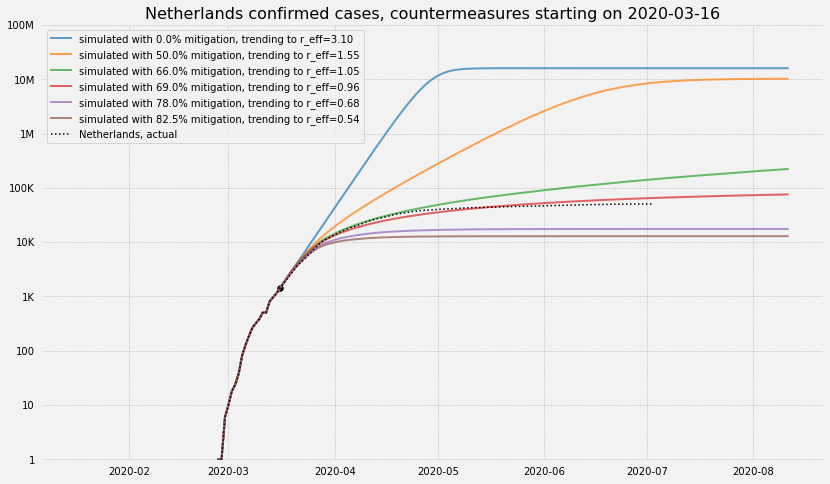

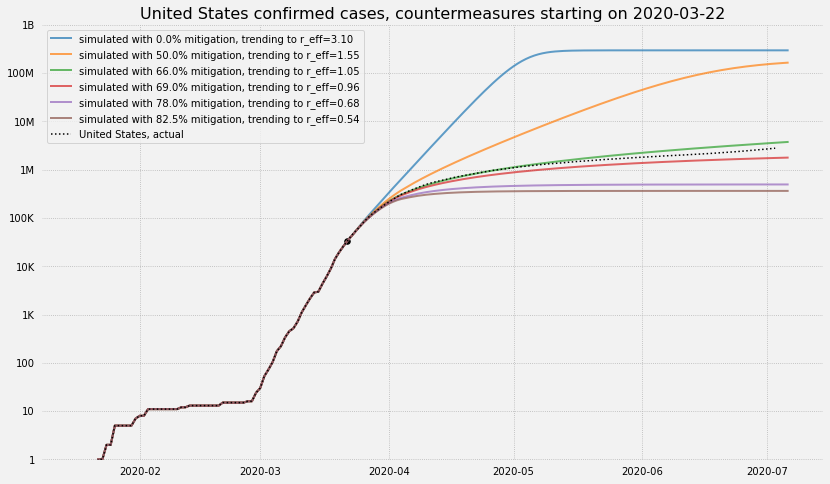

In [20]:
cfr = 0.04
r0 = 3.1

country_start_days = {
    "China": 9,
    "South Korea": 33,
    "Italy": 37,
    "Iran": 13,
    "Netherlands": 18,
    "United States": 60
}

for country in country_start_days:
    s = country_start_days[country]
    actual, _ = data.simulate_country(country, days=0, cfr=cfr, r0=r0, from_day=-1)
    for i, f in enumerate([1.0, 0.5, 0.34, 0.31, 0.22, 0.175]):
        r_eff = r0 * f        
        sim, today = data.simulate_country(country, days=100, cfr=cfr, r0=r0, from_day=s, 
                                           mitigation_start=1, mitigation_end=f)
        plt.plot(sim.confirmed, label=f"simulated with {1-f:.1%} mitigation, trending to "+
                 f"r_eff={r_eff:.2f}", linestyle="-", lw=2, alpha=0.7)
        
    plt.plot(actual.confirmed, ":", label=f"{country}, actual", c="k")
    plt.scatter(sim.index[s], sim.confirmed[s], c="k", s=30)
    plt.grid()
    plt.legend()
    set_y_axis_format(actual.max().max(), True)
    plt.title(f"{country} confirmed cases, countermeasures starting on {sim.index[s].date()}", fontsize=16)
    plt.show()